In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pylab import rcParams  #figure size in inches

import warnings
warnings.filterwarnings('ignore')

# add plots to Jupyter notebook
%matplotlib inline   

In [2]:
apps= pd.read_csv('../../capstone two/googleplaystore.csv')  # open file in the up-level folder
reviews= pd.read_csv('../../capstone two/googleplaystore_user_reviews.csv')



## Data Quality

**Table "apps"** \
Rating is null \
duplicatd rows \
row 10472 mismatched \

price: remove $ sign and astype to float\
size: replace M and K with 000000 and 000 seperately, astype to float \
installs: remove + and astype to integer \
LastUpdated: astype to datetime\

**Table "reviews"**\
Translated_Review is null

In [3]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
apps.sample(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
979,SHOWTIME,ENTERTAINMENT,4.2,12398,Varies with device,"1,000,000+",Free,0,Teen,Entertainment,"July 2, 2018",Varies with device,Varies with device
5759,Square Analog Clock AW-7,TOOLS,4.2,294,3.0M,"50,000+",Free,0,Everyone,Tools,"March 10, 2018",2.0,4.3 and up
8098,Igitabo cy'Indirimbo,FAMILY,4.5,93,1.6M,"50,000+",Free,0,Everyone,Entertainment,"February 5, 2018",INDIRIMBO V.2014.002,1.6 and up
6365,bk Group Mobile,BUSINESS,NaN,1,30M,50+,Free,0,Everyone,Business,"February 26, 2018",2.0,4.4W and up
8342,DF SmartPlus,TOOLS,NaN,0,36M,10+,Free,0,Everyone,Tools,"February 23, 2018",1.0.1,4.1 and up
8480,LineStar For DK,SPORTS,4.3,1387,14M,"50,000+",Free,0,Everyone,Sports,"June 6, 2018",3.0.3,4.0.3 and up
4481,Android-P Mono Grey EMUI 8/5 Theme,PERSONALIZATION,4.5,61,7.5M,"10,000+",Free,0,Everyone,Personalization,"April 4, 2018",4,4.4 and up
6144,BG+Phone Backup,PRODUCTIVITY,4.8,16,2.6M,"1,000+",Free,0,Everyone,Productivity,"February 17, 2017",1.0.3,2.3 and up
346,imo beta free calls and text,COMMUNICATION,4.3,659395,11M,"100,000,000+",Free,0,Everyone,Communication,"June 7, 2018",9.8.000000010492,4.0 and up
7822,Asiimov Skin - CS GO Icon Pack,PERSONALIZATION,4.6,26,8.5M,100+,Paid,$2.49,Everyone,Personalization,"December 3, 2017",5.0.1,4.0.3 and up


In [5]:
apps[apps['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [6]:
apps[apps.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [7]:
apps[apps['Rating']> 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [9]:
reviews[reviews['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [10]:
reviews.sample(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
43318,Fair: A New Way To Own A Car,NaN,NaN,NaN,NaN
435,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,After update emoji can't used normally...,Positive,0.150000,0.650000
36742,Draw.ly - Color by Number Pixel Art Coloring,NaN,NaN,NaN,NaN
4507,Advanced Task Killer,NaN,NaN,NaN,NaN
9067,Arrow.io,"Stop ads WiFi works well, game keeps kicking I...",Negative,-0.400000,0.400000
47187,Flipboard: News For Our Time,Great reads time,Positive,0.800000,0.750000
832,3D Color Pixel by Number - Sandbox Art Coloring,NaN,NaN,NaN,NaN
39830,"Emoji keyboard - Cute Emoticons, GIF, Stickers",NaN,NaN,NaN,NaN
7468,Angry Birds Classic,It video Ads every two levels. It distracting ...,Positive,0.266667,0.666667
41978,EzCalculator,It's free!,Positive,0.500000,0.800000


<h2>Data Cleaning<h2>

In [11]:
apps_clean= apps.copy()

In [12]:
# shifted row in 10472, drop single row by index
apps_clean.iloc[10470:10475, :]

apps_clean.drop([10472],inplace=True)  #  inplace=True
apps_clean.iloc[10470:10475, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


In [13]:
# drop all null rows, and duplicated rows
apps_clean.dropna(inplace=True)
apps_clean.drop_duplicates(inplace=True)


In [14]:
# apps_clean.info()
apps_clean[apps_clean.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [15]:
# replace 'M' or 'k' with '0', astype to int
apps_clean['Installs']= apps_clean.Installs.str.replace('+', '')
apps_clean['Installs']= apps_clean.Installs.str.replace(',', '')

apps_clean['Installs_num']= pd.to_numeric(apps_clean['Installs'])
apps_clean['Installs_num'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

In [16]:
#  new df with numric size
apps_clean['Size'].unique()
df=apps_clean[apps_clean['Size']!='Varies with device']
df['Size'] = df.Size.str.replace('k', '')
df['Size'] = df.Size.str.replace('M', 'e+3')
df['Size'] = df.Size.str.replace('+', '').str.replace(',', '').astype('float')
# df['Size'].unique()

In [17]:
# price clean
apps_clean['Price']=apps_clean.Price.str.replace('$','').astype('float')


In [18]:
# astype review to integer
apps_clean['Reviews'] = apps_clean.Reviews.astype('int')

In [142]:
apps_clean.to_csv('google apps updated.csv',index=False)


In [20]:
reviews_clean= reviews.copy()
reviews_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [143]:
reviews_clean.dropna(inplace=True)
reviews_clean.to_csv('google apps REVIEWS updated.csv',index=False)

In [22]:
reviews_clean.sample(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
21481,"Calm - Meditate, Sleep, Relax","can't sign , lol... stupid",Positive,5.550000e-17,0.850000
19821,CBS Sports Fantasy,Good,Positive,7.000000e-01,0.600000
42412,FOX NOW - On Demand & Live TV,Was great recently! The starts show kicks out....,Positive,7.537879e-02,0.449378
44819,Fast News,This gateway pop-up scam ads. This problem cou...,Positive,1.666667e-01,0.291667
37540,Dunkin' Donuts,It's easy super convenient. For REALLY specifi...,Positive,9.523809e-02,0.299405
21964,Calorie Counter - MyFitnessPal,I love app! It makes easy track food taking ca...,Positive,3.583333e-01,0.606667
12176,Banco do Brasil,"It's still a better market, but a lot of bugs ...",Positive,5.000000e-01,0.500000
31158,Cut the Rope 2,Too many unskippable ads. You're forced watch ...,Positive,1.000000e-01,0.350000
16255,Blood Donor,I like easy manage,Positive,4.333333e-01,0.833333
43759,Family Locator - GPS Tracker,always update kids left location. It let know ...,Neutral,0.000000e+00,0.000000


## Exploratory  data analysis


### Most popular (installed) apps  by category

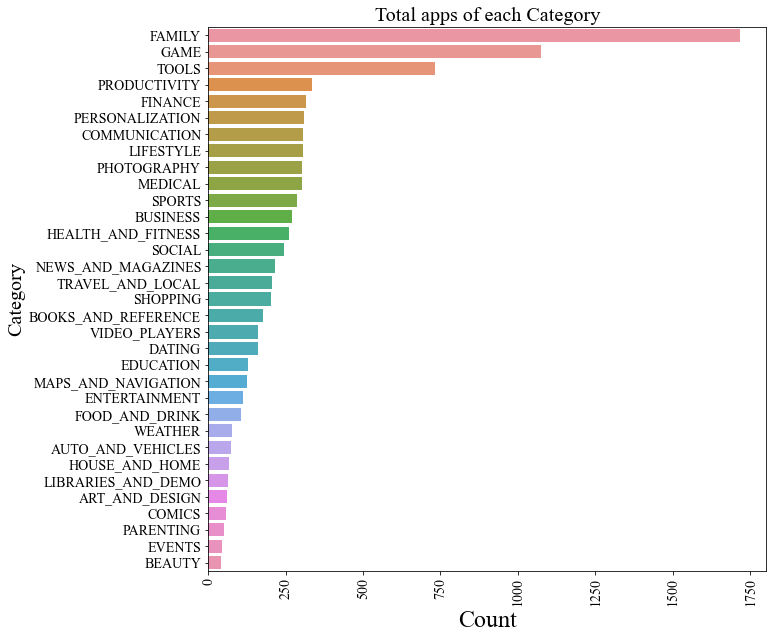

In [23]:
# Which category has more apps
plt.figure(figsize=(10,10))
orders = apps_clean.groupby(['Category']).size()
orders = orders.sort_values(ascending=False)

_= sns.countplot(y="Category",data=apps_clean,order=orders.index)


csfont={'fontname':'Times New Roman'}  # FONT TYPE
plt.xticks(rotation=90,size=14,**csfont)
plt.yticks(size=14,**csfont)
plt.xlabel('Count',size=24,**csfont)
plt.ylabel('Category',size =20,**csfont)
plt.title('Total apps of each Category',size = 20,**csfont)
plt.savefig('Apps in each category.jpg',bbox_inches='tight');

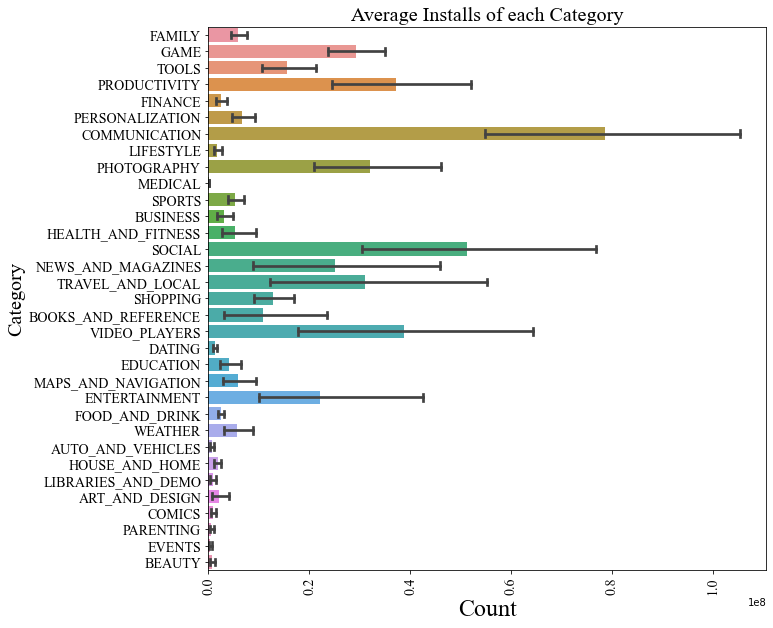

In [24]:
plt.figure(figsize=(10,10))
_ = sns.barplot(x="Installs_num", y="Category", data=apps_clean,order=orders.index,capsize=0.4 )
plt.title('Installations in each Category',size = 20)

csfont={'fontname':'Times New Roman'}  # FONT TYPE
plt.xticks(rotation=90,size=14,**csfont)
plt.yticks(size=14,**csfont)
plt.xlabel('Count',size=24,**csfont)
plt.ylabel('Category',size =20,**csfont)
plt.title('Average Installs of each Category',size = 20,**csfont)
plt.savefig('Average insatlls in each category.jpg',bbox_inches='tight');

In [25]:
### Apps size distribution, Price strategy,

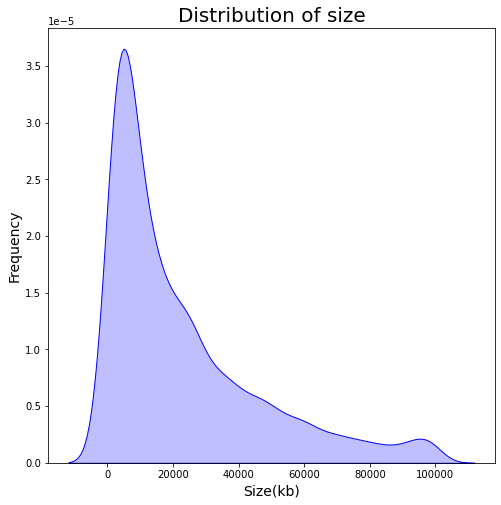

In [85]:
rcParams['figure.figsize'] = 8,8
_ = sns.kdeplot(df.Size, color="Blue", shade = True)
# _=plt.hist(df.Size)
_.set_xlabel("Size(kb)",size = 14)
_.set_ylabel("Frequency",size = 14)
plt.title('Distribution of size',size = 20)
plt.savefig('Distribution of size.jpg', bbox_inches='tight')

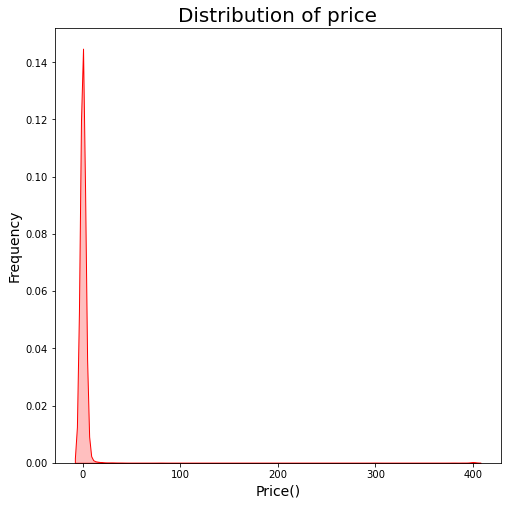

In [79]:
rcParams['figure.figsize'] = 8,8
_ = sns.kdeplot(apps_clean.Price, color="Red", shade = True)
_.set_xlabel("Price()",size = 14)
_.set_ylabel("Frequency",size = 14)
plt.title('Distribution of price',size = 20)
plt.savefig('Distribution of price.jpg', bbox_inches='tight')

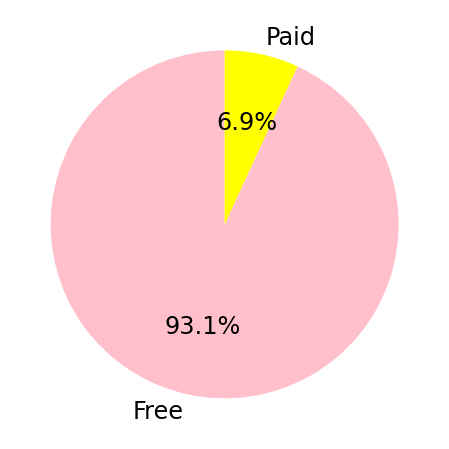

In [83]:
sorted_counts= apps_clean['Type'].value_counts()
colors=['pink','yellow']
plt.pie(sorted_counts, autopct="%.1f%%", labels=sorted_counts.index, startangle=90,colors=colors,textprops={'fontsize': 24})
plt.savefig('Type of price.jpg', bbox_inches='tight');

### Rating of apps across category

In [95]:
# _=sns.FacetGrid(data=apps_clean, col='Category',col_wrap=8, sharey=False)
# _.map(plt.hist,'Rating');


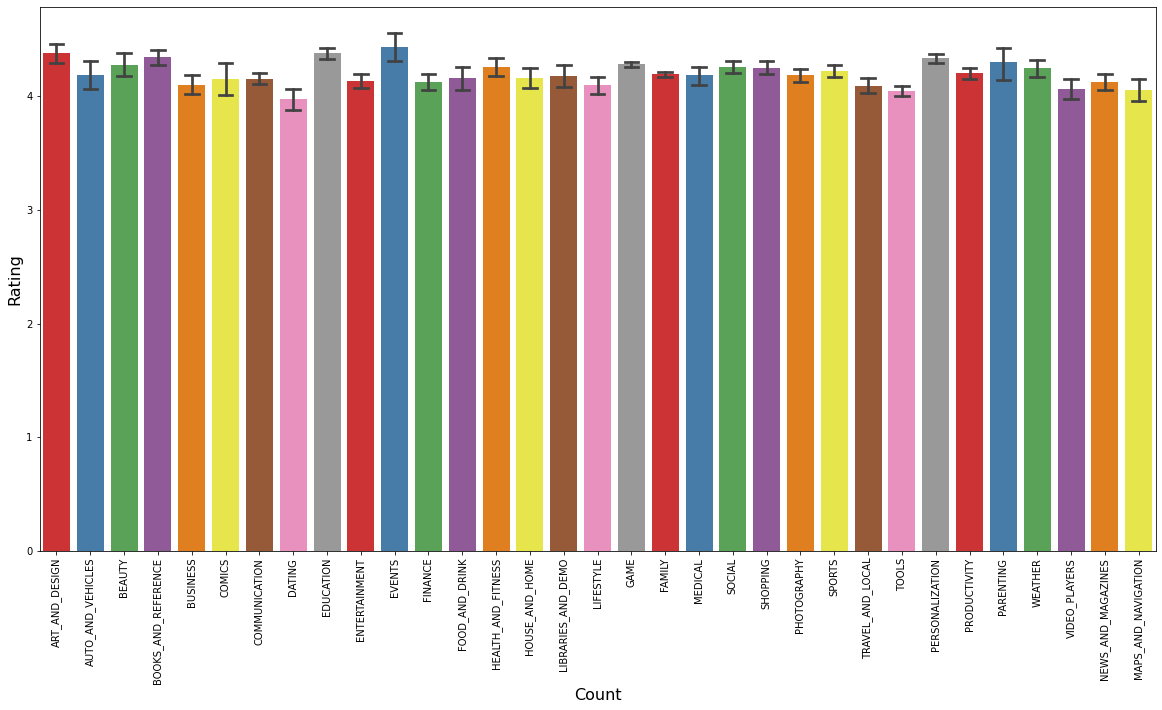

In [96]:
# rating  in each category
rcParams['figure.figsize'] = 20,10
fig,ax=plt.subplots()
ax= sns.barplot(x='Category', y='Rating', data=apps_clean, palette = "Set1",capsize=0.4 ) 
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.ylabel('Rating',size=16)
plt.xlabel('Count',size=16)
plt.savefig('Rating across category.jpg', bbox_inches='tight')

## Correlation analysis: Installs vs size, rating, review, price 

In [100]:
apps_clean['Installs_log']= np.log(apps_clean['Installs_num'])

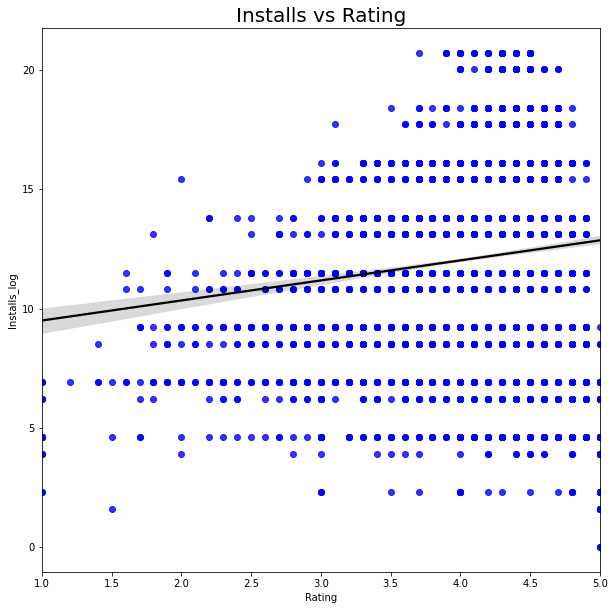

In [125]:
# Installs(log) vs rating
plt.figure(figsize = (10,10))
_= sns.regplot( x="Rating", y="Installs_log",data=apps_clean, scatter_kws={"color": "blue"}, line_kws={"color": "black"})
plt.title('Installs vs Rating',size=20)
plt.savefig('Installs vs Rating.jpg',bbox_inches='tight')
plt.show()

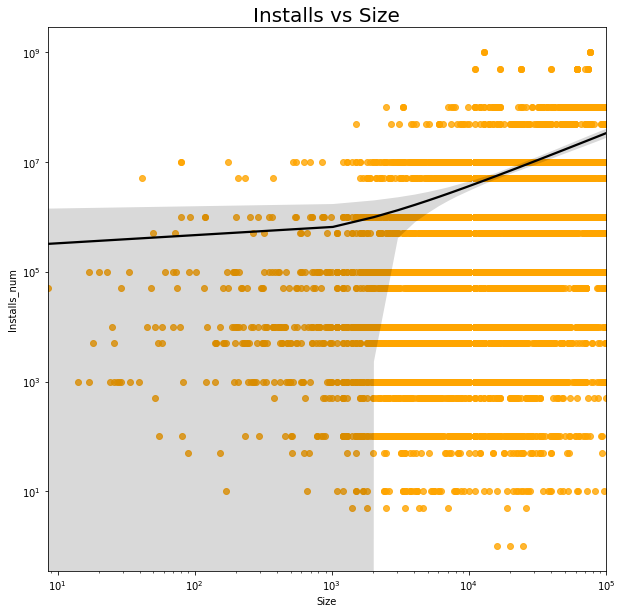

In [126]:
df['Installs_log']= np.log(df['Installs_num'])
# Installs(log) vs size
plt.figure(figsize = (10,10))
_= sns.regplot( x="Size", y="Installs_num",data=df, scatter_kws={"color": "orange"}, line_kws={"color": "black"})
plt.title('Installs vs Size',size=20)
plt.xscale('log')
plt.yscale('log')
# _.set_xlim(1000,100000)
# _.set_ylim(100000,10000000000)
plt.savefig('Installs vs Size.jpg',bbox_inches='tight')
plt.show()

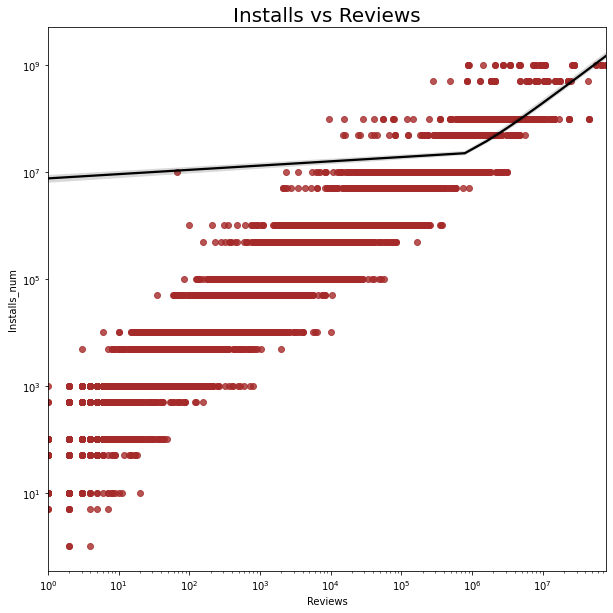

In [127]:
# Installs(log) vs size
plt.figure(figsize = (10,10))
_= sns.regplot( x="Reviews", y="Installs_num",data=apps_clean, scatter_kws={"color": "brown"}, line_kws={"color": "black"})
plt.title('Installs vs Reviews',size=20)
plt.xscale('log')
plt.yscale('log')
# _.set_xlim(100000,100000000)
# _.set_ylim(10000000,10000000000)
plt.savefig('Installs vs Reviews.jpg',bbox_inches='tight');

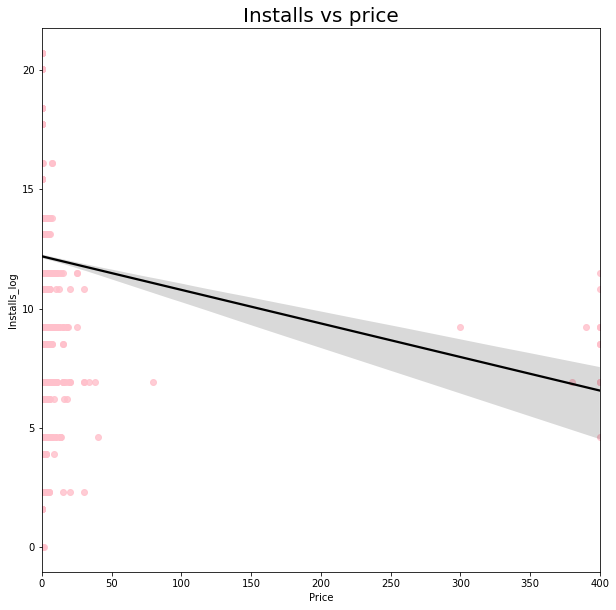

In [128]:
# Installs(log) vs rating
plt.figure(figsize = (10,10))
_= sns.regplot( x="Price", y="Installs_log",data=apps_clean, scatter_kws={"color": "pink"}, line_kws={"color": "black"})
plt.title('Installs vs price',size=20)
# plt.xscale('log')
plt.savefig('Installs vs price.jpg',bbox_inches='tight')
plt.show()

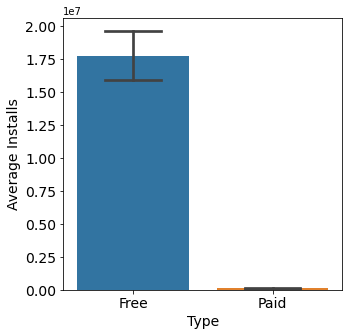

In [139]:
plt.figure(figsize = (5,5))
_=sns.barplot(x='Type', y='Installs_num', data=apps_clean, capsize=0.4 ) 
plt.ylabel('Average Installs',size=14)
plt.xlabel('Type',size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.savefig('type vs installs.jpg', bbox_inches='tight')